<div style="background:#F5F7FA; height:100px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Want to do more?</span><span style="border: 1px solid #3d70b2;padding: 15px;float:right;margin-right:40px; color:#3d70b2; "><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
<span style="color:#5A6872;"> Try out this notebook with your free trial of IBM Watson Studio.</span>
</div>

# Analyze open data sets with pandas DataFrames

In this notebook, you'll learn how to use open data from the data sets on the Watson Studio home page in a Python notebook. You will load, clean, and explore the data with pandas DataFrames. 

Some familiarity with Python is recommended. This notebook runs on Python 2 and 3.

The data sets for this notebook are from the World Development Indicators (WDI) data set. The WDI data set is a statistical benchmark that helps measure the progress of human development. The WDI data set draws on data from the World Bank and more than 30 partners. You'll look at seven key development variables, sorted by country and year.

## Learning goals

1. Access data from the Watson Studio home page.
1. Merge multiple data sets in pandas DataFrames.
1. Structure data for analysis.
1. Generate summary statistics.
1. Create charts with custom formatting.
1. Show relationships between all variables.

## Table of contents
The main parts of this notebook are:
1. [Load data into DataFrames](#load)
    1. [Load the first data set](#first)
    1. [Load another data set](#loadsecond)
    1. [Join the DataFrames](#joindataframes)
    1. [Add more data](#loadmore)
    1. [Create a MultiIndex](#multiindex)
1. [Check the data](#check)
1. [Analyze the data](#analysis)
    1. [Create scatter plots with matplotlib](#matplotlib)
    1. [Create a scatter plot matrix](#matrix)
1. [Next steps](#summary)

<a id="load"></a>
## 1. Load data into DataFrames

To load the data, you obtain access key links and put them into the code to create pandas DataFrames. You will load data into multiple DataFrames and then merge the DataFrames and create a MultiIndex to structure the data for analysis.

<a id="first"></a>
### A. Load the first data set

The first data set that you'll load contains life expectancy data.

To get your access key link and load the first data set:
1. Find the data set and get the access key link:
    1. On the Watson Studio home page, search for "life expectancy."
    1. Click the card with the title [Life expectancy at birth by country in total years](https://apsportal.ibm.com/exchange/public/entry/view/f15be429051727172e0d0c226e2ce895).
    1. Click the link button.
    1. Hover above the link button next to the access key to display the link.
    1. Double-click the link to select it, copy the link, and click **Close**.
    1. Insert the access key link and run the cell to load the data:
    1. In the cell below, replace the **LINK-TO-DATA** string in the `read_csv()` method with the link.
    1. Run the following cell to import the pandas and numpy libraries, rename and load three columns of the data into the DataFrame, and show the first five rows of data.

In [1]:
import pandas as pd
import numpy as np

# life expectancy at birth in years
life = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area','Year','Value'])
life.columns = ['country','year','life']
life[0:5]

,country,year,life
0,Afghanistan,2012,60.509122
1,Afghanistan,2011,60.065366
2,Afghanistan,2010,59.600098
3,Afghanistan,2009,59.112341
4,Afghanistan,2008,58.607098


<a id="loadsecond"></a>
### B. Load another data set

The life expectancy figures are more meaningful if you combine them with other data sets. Get an access key link for this data set: [Total population by country](https://apsportal.ibm.com/exchange/public/entry/view/889ca053a19986a4445839358a91963e). Paste your link in the following cell, which loads three columns of the data and prints the number of countries in each data set: 

In [4]:
# population
population = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area', 'Year','Value'])
population.columns = ['country', 'year','population']

print("Nr of countries in life:", np.size(np.unique(life['country'])))
print("Nr of countries in population:", np.size(np.unique(population['country'])))

Nr of countries in life: 246
Nr of countries in population: 245


<a id="joindataframes"></a>
### C. Join DataFrames

As you can see, the two data sets don't fit together perfectly: one contains more countries than the other. When you join two DataFrames, it's common to introduce nulls or NaNs (a value that's not a number when a number is expected) into the resulting DataFrame. 

Use the pandas `merge` function to make the data fit together. In the following cell, the `how='outer'` option specifies to keep the data from the `life` and `population` columns. The `on=['country','year']` option specifies which columns to merge on. To view the options for the `merge` function, see <a href="http://pandas.pydata.org/pandas-docs/stable/merging.html" target="_blank" rel="noopener noreferrer">Merge, join, and concatentate</a>.

In [5]:
df = pd.merge(life, population, how='outer', sort=True, on=['country','year'])
df[400:405]

,country,year,life,population
400,Andorra,1978,NaN,33746.0
401,Andorra,1979,NaN,34819.0
402,Andorra,1980,NaN,36063.0
403,Andorra,1981,NaN,37502.0
404,Andorra,1982,NaN,39112.0


<a id="loadmore"></a>
### D. Add more data 

Add more data about development to the DataFrame. For each data set, you'll include the country and year columns, plus a column that contains the key development variable for that data set. For the employment data set, you'll derive a column from three original columns.

For each of these data sets, get an access key link for the data and paste the link into the appropriate section of the following cell:
* [Population below national poverty line, total, percentage](https://apsportal.ibm.com/exchange/public/entry/view/3a42de810e682d5a83e76fda9fea2bbe)
* [Primary school completion rate % of relevant age group by country](https://apsportal.ibm.com/exchange/public/entry/view/97fc6c420265012ae9b5e9439b9ee293)
* [Total employment, by economic activity (Thousands)](https://apsportal.ibm.com/exchange/public/entry/view/21c789ae4cfadf52f1bb14b5d4a0b99c)
* [Births attended by skilled health staff (% of total) by country](https://apsportal.ibm.com/exchange/public/entry/view/87160cc8374805cb3b07dff4b4f9223e)
* [Measles immunization % children 12-23 months by country](https://apsportal.ibm.com/exchange/public/entry/view/752e36ea889eca360e989baa785c2a5e)

In [6]:
# Population below national poverty line, total, percentage
poverty = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area', 'Year','Value'])
poverty.columns = ['country', 'year','poverty']
df = pd.merge(df, poverty, how='outer', sort=True, on=['country','year'])

# Primary school completion rate % of relevant age group by country
school = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area', 'Year','Value'])
school.columns = ['country', 'year','school']
df = pd.merge(df, school, how='outer', sort=True, on=['country','year'])

# Total employment, by economic activity (Thousands)
employmentin = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area', 'Year','Value','Sex','Subclassification'])
employment = employmentin.loc[(employmentin.Sex=='Total men and women')&
                              (employmentin.Subclassification=='Total.')]
employment = employment.drop('Sex', 1)
employment = employment.drop('Subclassification', 1)
employment.columns = ['country', 'year','employment']
df = pd.merge(df, employment, how='outer', sort=True, on=['country','year'])

# Births attended by skilled health staff (% of total) by country
births = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area', 'Year','Value'])
births.columns = ['country', 'year','births']
df = pd.merge(df, births, how='outer', sort=True, on=['country','year'])

# Measles immunization % children 12-23 months by country
measles = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area', 'Year','Value'])
measles.columns = ['country', 'year','measles']
df = pd.merge(df, measles, how='outer', sort=True, on=['country','year'])

df[0:50]

,country,year,life,population,poverty,school,employment,births,measles
0,2,Derived using linearly extrapolated data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,National estimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Derived using linearly interpolated data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,UNESCO Institute for Statistics (UIS) estimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Derived using extrapolated data assuming the s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Derived using interpolated data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Derived using extrapolated data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Derived using linearly extrapolated data assum...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Derived using preliminary data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,1960,NaN,8774440.0,NaN,NaN,NaN,NaN,NaN


The resulting table looks strange because the first 40 rows contain incorrect values, such as numbers in the `country` column and text in the `year` column. Run the following cell to delete the first 40 rows from the DataFrame: 

In [7]:
df=df.drop(df.index[0:40])

df[0:10]

,country,year,life,population,poverty,school,employment,births,measles
40,Afghanistan,1991,NaN,12612043.0,NaN,NaN,NaN,NaN,19.0
41,Afghanistan,1992,NaN,13811876.0,NaN,NaN,NaN,NaN,22.0
42,Afghanistan,1993,NaN,15175325.0,NaN,NaN,NaN,NaN,25.0
43,Afghanistan,1994,NaN,16485018.0,NaN,NaN,NaN,NaN,40.0
44,Afghanistan,1995,NaN,17586073.0,NaN,NaN,NaN,NaN,41.0
45,Afghanistan,1996,NaN,18415307.0,NaN,NaN,NaN,NaN,42.0
46,Afghanistan,1997,NaN,19021226.0,NaN,NaN,NaN,NaN,38.0
47,Afghanistan,1998,NaN,19496836.0,NaN,NaN,NaN,NaN,31.0
48,Afghanistan,1999,NaN,19987071.0,NaN,NaN,NaN,NaN,31.0
49,Afghanistan,2000,NaN,20595360.0,NaN,NaN,NaN,12.4,27.0


<a id="multiindex"></a>
### E. Create a MultiIndex

You structure the data for analysis by creating a pandas MultiIndex. A MultiIndex is a hierarchical index that groups the data so that you can easily summarize it.
For example, by grouping by country and then by year, you can plot the average value per country for all years instead of plotting a value for every country for every year.

Run this cell to create a MultiIndex on the country and the year:

In [8]:
df2 = df.set_index(['country','year'])

df2[0:10]

life  population  poverty  school  employment  births  \
country     year                                                          
Afghanistan 1991   NaN  12612043.0      NaN     NaN         NaN     NaN   
            1992   NaN  13811876.0      NaN     NaN         NaN     NaN   
            1993   NaN  15175325.0      NaN     NaN         NaN     NaN   
            1994   NaN  16485018.0      NaN     NaN         NaN     NaN   
            1995   NaN  17586073.0      NaN     NaN         NaN     NaN   
            1996   NaN  18415307.0      NaN     NaN         NaN     NaN   
            1997   NaN  19021226.0      NaN     NaN         NaN     NaN   
            1998   NaN  19496836.0      NaN     NaN         NaN     NaN   
            1999   NaN  19987071.0      NaN     NaN         NaN     NaN   
            2000   NaN  20595360.0      NaN     NaN         NaN    12.4   

                  measles  
country     year           
Afghanistan 1991     19.0  
            1992     22.0  
            1993     25.0  
            1994     40.0  
            1995     41.0  
            1996     42.0  
            1997     38.0  
            1998     31.0  
            1999     31.0  
            2000     27.0

You can see that for the 1980s, the only data for Afghanistan is about measles immunizations. 

If you are curious about other variables, you can add more WDI data sets from the Watson Studio home page to this DataFrame. Not all WDI data is properly formatted. You might need to clean the data before you add it. You can reuse the code samples that you just ran. Make sure that you keep checking the results by running commands like `df2[0:10]` on your tables when you load or change them. 

<a id="check"></a>
## 2. Check the data 
You can check the data with the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html" target="_blank" rel="noopener noreferrer">`describe()` method</a>, which calculates basic summary statistics for each of the columns in the DataFrame (except the country and year columns). 

Run the following cell to show the number of values (count), the mean, the standard deviation (std), the minimum value, three percentiles, and the maximum value for the columns:  

In [9]:
df2.describe()

,life,population,poverty,school,employment,births,measles
count,11969.000000,1.328800e+04,651.000000,5078.000000,2909.000000,1523.000000,6934.000000
mean,63.156417,1.393916e+08,30.763209,78.018509,14337.147966,83.944882,76.537392
std,11.290103,5.411527e+08,17.349350,25.675860,57236.797036,23.885349,22.054563
min,19.504927,4.279000e+03,1.700000,1.522030,0.663000,5.000000,1.000000
25%,54.884268,8.577282e+05,17.245109,60.831905,954.300000,73.650000,65.000000
50%,66.171191,5.409290e+06,26.900000,88.120480,3256.500000,98.000000,84.000000
75%,71.691415,2.609458e+07,43.700000,97.417360,9463.000000,99.700000,94.000000
max,83.480488,7.124544e+09,96.000000,193.263340,737400.000000,100.000000,99.000000


<a id="analysis"></a>
## 3. Analyze the data
Now that you have enough sample data to work with, you can find the correlation between different variables. You'll create scatter plots that each compare two variables. 

<a id="matplotlib"></a>
### A. Create scatter plots with matplotlib

Run the following cell to create two scatter plots that relate the values of population and amount of schooling to life expectancy. Use `matplotlib` library commands to create charts with custom font, figure size, and colors. 

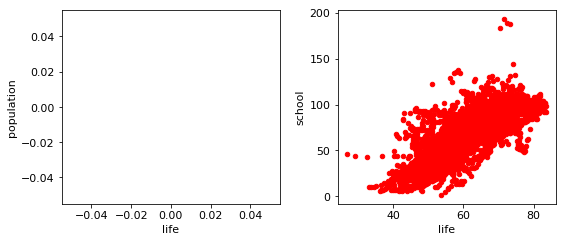

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size']=11
plt.rcParams['figure.figsize']=[8.0, 3.5]
fig, axes=plt.subplots(nrows=1, ncols=2)
df2.plot(kind='scatter', x='life', y='population', ax=axes[0], color='Blue');
df2.plot(kind='scatter', x='life', y='school', ax=axes[1], color='Red');
plt.tight_layout()

The chart on the left shows that increased life expectancy leads to higher population. Each dot represents a value for one country for one year.

The chart on the right shows that the life expectancy increases with the percentage of school completion. Each dot represents the average value for one country for all years that have data. Notice that the percentage goes up to 200% instead of 100%. This might indicate a problem with the data. You can remove the outliers and keep only the values less than 100% with a command like: `df2[df2.school>100]=float('NaN')`. Even better, you can check where these values in the original data came from. Otherwise, a range like this might indicate an error in your code. In this case, however, the values are correct because of the way the school completion data was calculated: read the description of [Primary school completion rate % of relevant age group by country](https://apsportal.ibm.com/exchange/public/entry/view/97fc6c420265012ae9b5e9439b9ee293). Percentages higher than 100 indicate that older people are finishing primary school.

<a id="matrix"></a>
### B. Create a scatter plot matrix

You can create charts that show the relationships between all variables with a scatter plot matrix. Each dot represents the average value for one country for all years that have data. 

Run the following cell to create scatter plots and histograms from the DataFrame with the `scatter_matrix()` method. Because the data does not cover the same years, group the data by country (with some loss of data). Many variables are percentages, so convert the employment figures to percentages as well. Drop the `population` column, because you don't need it anymore. 

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


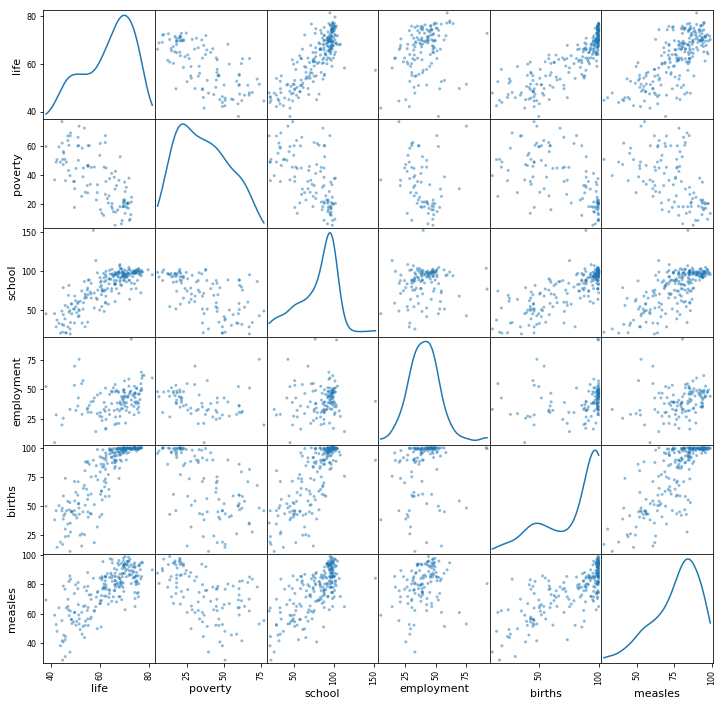

In [12]:
from pandas.tools.plotting import scatter_matrix

# group by country
grouped = df2.groupby(level=0)
dfgroup = grouped.mean()

# employment in % of total population
dfgroup['employment']=(dfgroup['employment']*1000.)/dfgroup['population']*100
dfgroup=dfgroup.drop('population',1)

scatter_matrix(dfgroup,figsize=(12, 12), diagonal='kde');

You can see that the data is now in a pretty good state. There are no large outliers. You start to see some relationships: life expectancy increases with schooling, employment, safe births, and measles vaccination. 

<a id="summary"></a>
## 4. Next steps
You are deriving insights from the data and can now build a statistical model, for example, try an _ordinary least squares_ regression (<a href="http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html" target="_blank" rel="noopener noreferrer" >OLS</a> from <a href="http://statsmodels.sourceforge.net" target="_blank" rel="noopener noreferrer" >StatsModels</a>). 

As you can see from this sample notebook, data analysis entails a lot of trial and error. This experimentation can be challenging, but also a lot of fun!

### Author

**Margriet Groenendijk**, PhD, is a Developer Advocate at IBM Cloud Data Services. Currently she is all about data: from storing, cleaning, munging, and analysing to visualising. She creates clear plots and figures to show new insights from diverse data. She uses a range of tools for this, such as IBM Cloudant, IBM dashDB, Apache Spark, and Python notebooks. 

Copyright © 2017, 2018 IBM. This notebook and its source code are released under the terms of the MIT License.